<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##**Tugas *2*: *Classification***

###**Tenggat Waktu: 19 November 2022, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dataset yang digunakan pada tugas ini beserta deskripsinya telah disediakan di SCeLe.
2. Buatlah program Jupyter Notebook yang menjawab pertanyaan sesuai dengan perintah soal yang disediakan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_Tugas2_NPM_Nama.ipynb**. Contoh: A_Tugas2_2006123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **19 November 2022, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Praktikum ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [1]:
# Isi dengan data diri Anda
NAMA = "Sophie Andira Cindani Gardian"
KELAS = "C"
NPM = "2006597443"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = ['https://stephenallwright.com/remove-outliers-pandas/', 'https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/', 'https://analyticsindiamag.com/how-to-detect-and-treat-outliers-in-categorical-data/', 'https://www.kaggle.com/code/satishgunjal/tutorial-k-fold-cross-validation#K-Fold:-Classification-Example-', 'https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b', 'https://stats.stackexchange.com/questions/93928/naive-bayes-continuous-and-categorical-predictors', 'https://stackoverflow.com/questions/14254203/mixing-categorial-and-continuous-data-in-naive-bayes-classifier-using-scikit-lea', 'https://www.mygreatlearning.com/blog/gridsearchcv/', 'https://www.youtube.com/watch?v=Jrtn14j5gCE&list=PLzeH6W6NhxvAfQXR0_EyHoW9eDi0stgA2&index=5', 'https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b']

In [2]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Sophie Andira Cindani Gardian dari kelas C dengan NPM 2006597443, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Sophie Andira Cindani Gardian)


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as scp

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

## **Dataset**

Dataset yang digunakan adalah dataset Mobile Prices dimana kita memklasifikasi handphone lewat harganya, terdapat 21 atribut dan target atributnya adalah price_range.

Penjelesan atribut:
* battery_power : Total energy a battery can store in one time measured in mAh
* blue : Has bluetooth or not
* clock_speed : speed at which microprocessor executes instructions
* dual_sim : Has dual sim support or not
* fc : Front Camera mega pixels
* four_g : Has 4G or not
* int_memory : Internal Memory in Gigabytes
* m_dep : Mobile Depth in cm
* mobile_wt : Weight of mobile phone
* n_cores : Number of cores of processor
* pc : Primary Camera mega pixels
* px_height : Pixel Resolution Height
* px_width : Pixel Resolution Width
* ram : Random Access Memory in Mega Bytes
* sc_h : Screen Height of mobile in cm
* sc_w : Screen Width of mobile in cm
* talk_time : Longest time that a single battery charge will last when you are
* three_g : Has 3G or not
* touch_screen : Has touch screen or not
* wifi : Has wifi or not
* price_range : This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

Sumber: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification (dengan modifikasi)

## [25] **Preprocessing**

**Pada bagian ini Anda akan diminta untuk melakukan preprocessing dan eksplorasi data sebelum data digunakan dalam model klasifikasi.**

1\. [3] Berikan ringkasan mengenai data tersebut terkait dengan deskripsi setiap atribut, jumlah missing values, jumlah duplikasi data, dan kemungkinan adanya outliers pada data!

2\. [3] Berdasarkan eksplorasi anda pada nomor 1, lakukan data preparation hingga data tersebut menurut anda cukup “clean” dan dapat memberikan hasil klasifikasi yang maksimal.

**Jawaban untuk nomor 1 dan 2:**

In [4]:
df = pd.read_csv('mobile_phone.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7.0,0.6,188,2,...,20,756,2549.0,9,7,NaN,0,0.0,1.0,1
1,1021,1,0.5,1,0,1,53.0,0.7,136,3,...,905,1988,2631.0,17,3,7.0,1,1.0,0.0,2
2,563,1,0.5,1,2,1,41.0,0.9,145,5,...,1263,1716,2603.0,11,2,9.0,1,1.0,0.0,2
3,615,1,2.5,0,0,0,10.0,0.8,131,6,...,1216,1786,2769.0,16,8,11.0,1,0.0,0.0,2
4,1821,1,1.2,0,13,1,44.0,NaN,141,2,...,1208,1212,1411.0,8,2,15.0,1,1.0,0.0,1


In [5]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2021.000000,2021.000000,1920.000000,2021.000000,2021.000000,2021.000000,1915.000000,1928.000000,2021.000000,2021.000000,...,2021.000000,2021.000000,1927.000000,2021.000000,2021.000000,1937.000000,2021.000000,1925.000000,1922.000000,2021.000000
mean,1239.205344,0.492331,1.521302,0.505690,4.303810,0.523998,32.086162,0.501556,140.272143,4.532905,...,646.858981,1249.240970,2120.320187,12.323602,5.790203,11.022716,0.762494,0.504935,0.506243,1.503216
std,439.916748,0.500065,0.816020,0.500091,4.330382,0.499547,18.198040,0.289261,35.393281,2.291511,...,445.159739,433.141437,1079.774853,4.213155,4.369054,5.459042,0.425660,0.500106,0.500091,1.114537
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,852.000000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,284.000000,874.000000,1210.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,1.000000
50%,1230.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,567.000000,1245.000000,2130.000000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,2.000000
75%,1617.000000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.000000,1633.000000,3033.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.000000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2021 entries, 0 to 2020
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2021 non-null   int64  
 1   blue           2021 non-null   int64  
 2   clock_speed    1920 non-null   float64
 3   dual_sim       2021 non-null   int64  
 4   fc             2021 non-null   int64  
 5   four_g         2021 non-null   int64  
 6   int_memory     1915 non-null   float64
 7   m_dep          1928 non-null   float64
 8   mobile_wt      2021 non-null   int64  
 9   n_cores        2021 non-null   int64  
 10  pc             2021 non-null   int64  
 11  px_height      2021 non-null   int64  
 12  px_width       2021 non-null   int64  
 13  ram            1927 non-null   float64
 14  sc_h           2021 non-null   int64  
 15  sc_w           2021 non-null   int64  
 16  talk_time      1937 non-null   float64
 17  three_g        2021 non-null   int64  
 18  touch_sc

In [7]:
print("Jumlah baris : ", df.shape[0])
print("Jumlah kolom : ", df.shape[1])

Jumlah baris :  2021
Jumlah kolom :  21


In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2016    False
2017    False
2018    False
2019    False
2020    False
Length: 2021, dtype: bool

In [9]:
print("Jumlah duplikasi data : " + str(df.duplicated().sum()))

Jumlah duplikasi data : 21


Kemudian, saya melakukan handling duplikasi data dengan menghapus duplikasi data tersebut

In [10]:
df_tes = df.copy()
df_noDuplicate = df_tes.drop_duplicates(inplace = False)
print("Jumlah duplikasi data : " + str(df_noDuplicate.duplicated().sum()))

Jumlah duplikasi data : 0


Kemudian, saya ingin melakukan handle untuk outlier yang ada pada dataset

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


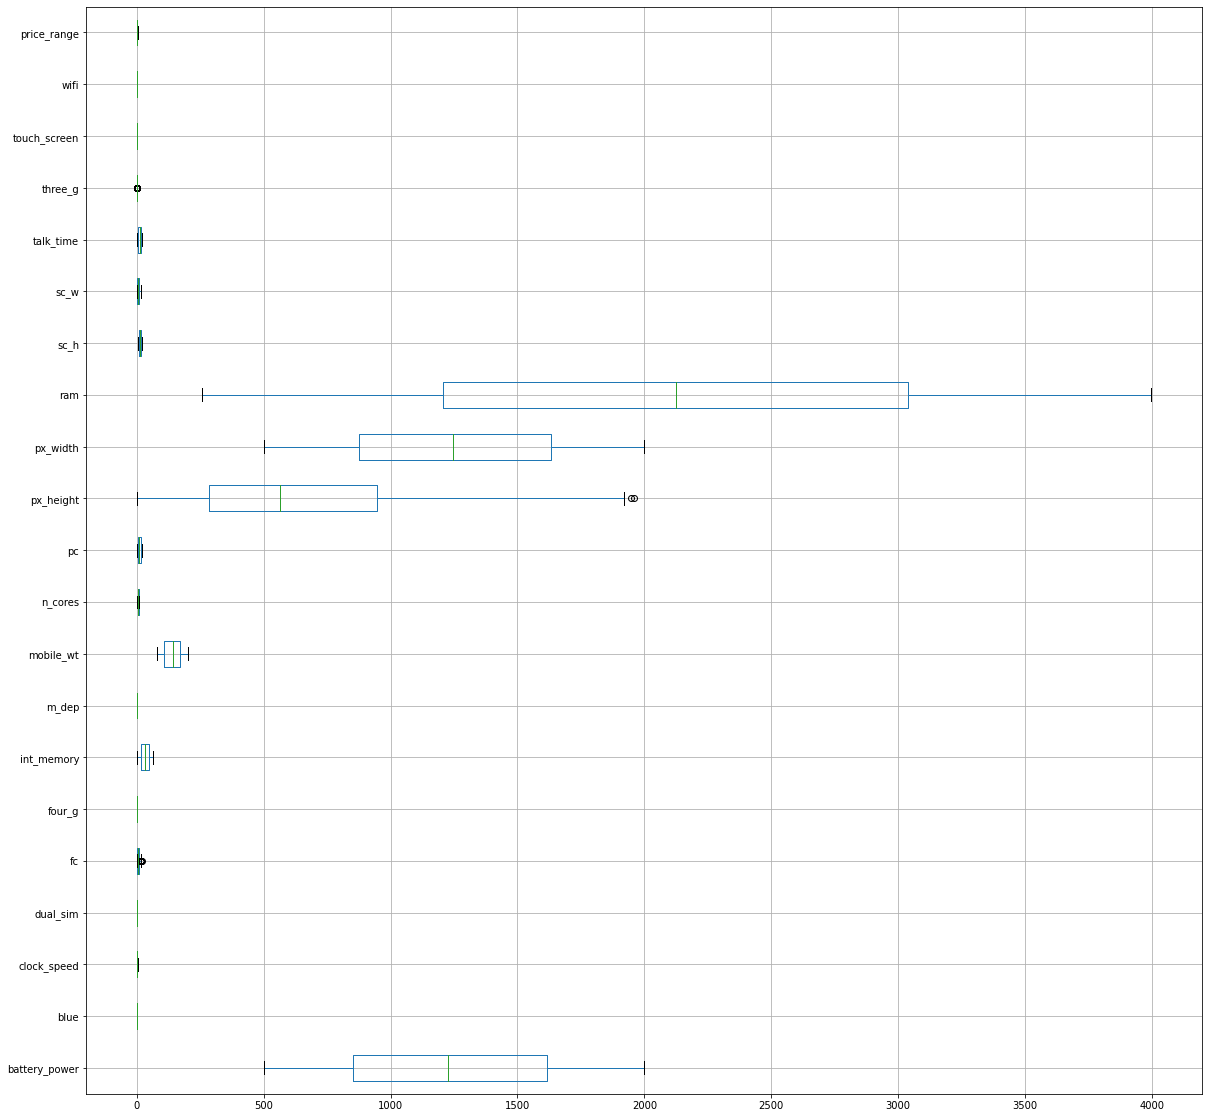

In [11]:
df_noDuplicate.boxplot(vert=False,figsize=(20,20))

In [12]:
Q3 = df_noDuplicate.quantile(0.75)
Q1 = df_noDuplicate.quantile(0.25)
IQR = Q3-Q1

Jumlah_Outlier = []

for col in df_noDuplicate.select_dtypes(np.number).columns:
    outliers = ((df_noDuplicate[col] < (Q1[col] - 1.5 * IQR[col])) | (df_noDuplicate[col] > (Q3[col] + 1.5 * IQR[col]))).sum()
    Jumlah_Outlier.append([col, outliers, outliers/len(df_noDuplicate)])
    
indexOutput = list(range(0, len(Jumlah_Outlier)))

pd.DataFrame(Jumlah_Outlier, columns=['Column', 'Outlier','persentase'],index=indexOutput).sort_values(by=['persentase'], ascending = False,ignore_index=True)

,Column,Outlier,persentase
0,three_g,477,0.2385
1,fc,18,0.0090
2,px_height,2,0.0010
3,battery_power,0,0.0000
4,wifi,0,0.0000
5,touch_screen,0,0.0000
6,talk_time,0,0.0000
7,sc_w,0,0.0000
8,sc_h,0,0.0000
9,ram,0,0.0000


Persentase outlier sangat sedikit pada dataset ini kecuali pada atribut three_g yaitu sebanyak 23.85%

Karena jumlah outlier cukup banyak untuk fitur three_g maka outlier-outlier tersebut tidak dihapus

Text(0.5, 0, 'three_g_count')

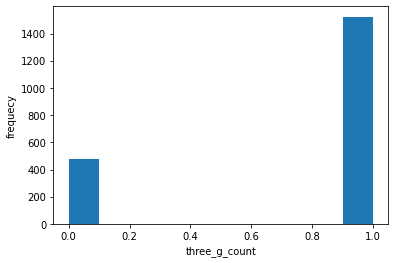

In [13]:
ax = df_noDuplicate['three_g'].plot.hist()
ax.set_ylabel("frequecy")
ax.set_xlabel("three_g_count")

Fitur three_g sendiri merupakan categorical feature dan menurut saya perbandingan nilainya 0 dan 1 masih masuk akal sehingga tidak dilakukan handling outlier

Kemudian saya melakukan handling untuk missing values. Berikut merupakan atribut-atribut yang memiliki missing values

In [14]:
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    
    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")
        
    else:
        print(missing_data[missing_data['Total'] > 0])

cek_null(df_noDuplicate)

              Total  Percent
talk_time        84   0.0420
m_dep            90   0.0450
ram              94   0.0470
touch_screen     96   0.0480
wifi             98   0.0490
clock_speed      99   0.0495
int_memory      106   0.0530


Kemudian, kita lihat distribusi dari atribut-atribut numerical yang memiliki null value

In [15]:
def countplot(column1):
  column = df[column1]
  plt.figure(figsize=(10,5))
  sns.kdeplot(column, shade=True)
  plt.show()

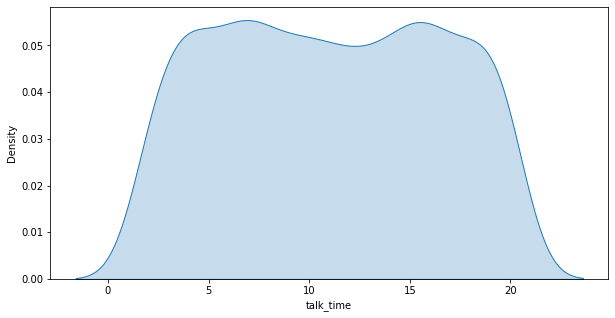

In [16]:
countplot('talk_time')

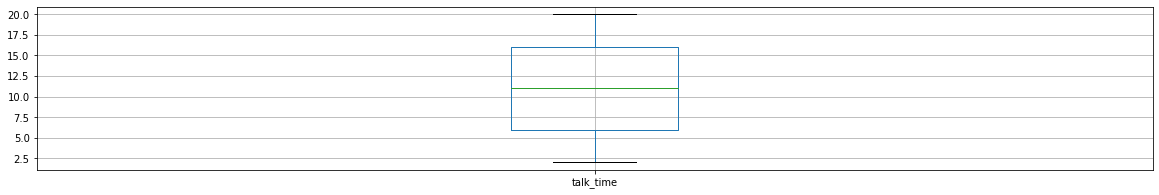

In [17]:
df_noDuplicate.boxplot(column=['talk_time'], figsize=(20,3))

Karena distribusi atribut talk_time berbentuk cukup simetris dan tidak ada outlier, maka saya akan mengisi null value pada atribut talk_time dengan mean

In [18]:
df_cleaned = df_noDuplicate.copy()
col = ['talk_time']
for c in col:
    mean = int(df_cleaned[~df_cleaned.isna()].talk_time.mean())
    df_cleaned[c] = df_cleaned[c].fillna(mean)

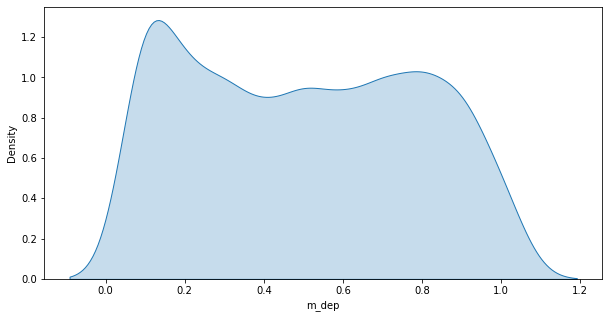

In [19]:
countplot('m_dep')

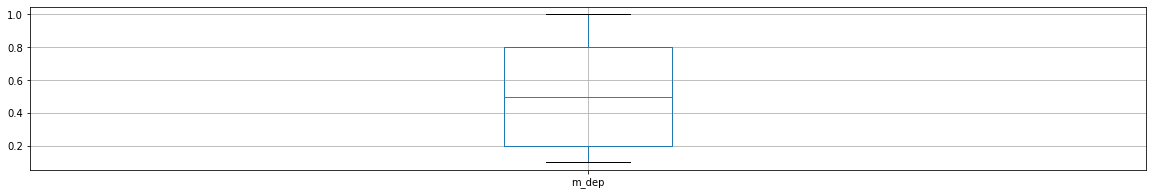

In [20]:
df_noDuplicate.boxplot(column=['m_dep'], figsize=(20,3))

In [21]:
df_noDuplicate['m_dep'].skew()

0.09087458555814715

Karena distribusi atribut m_dep berbentuk sedikit skewed dan tidak ada outlier, maka saya akan mengisi null value pada atribut m_dep dengan median

In [22]:
col = ['m_dep']
for c in col:
    median = int(df_cleaned[~df_cleaned.isna()].m_dep.median())
    df_cleaned[c] = df_cleaned[c].fillna(median)

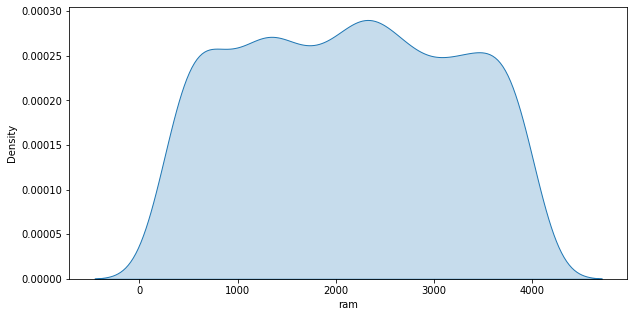

In [23]:
countplot('ram')

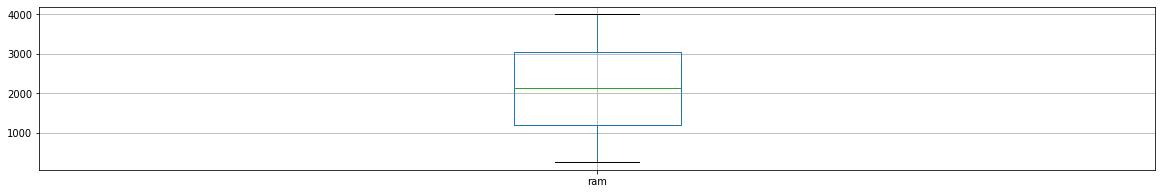

In [24]:
df_noDuplicate.boxplot(column=['ram'], figsize=(20,3))

In [25]:
df_noDuplicate['ram'].skew()

0.016832084179637528

Karena distribusi atribut ram berbentuk tidak begitu skewed dan tidak ada outlier, maka saya akan mengisi null value pada atribut ram dengan mean

In [26]:
col = ['ram']
for c in col:
    mean = int(df_cleaned[~df_cleaned.isna()].ram.mean())
    df_cleaned[c] = df_cleaned[c].fillna(mean)

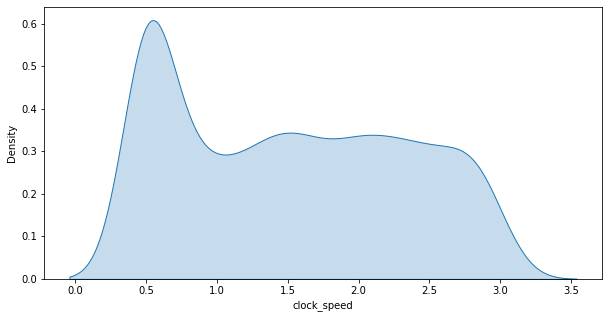

In [27]:
countplot('clock_speed')

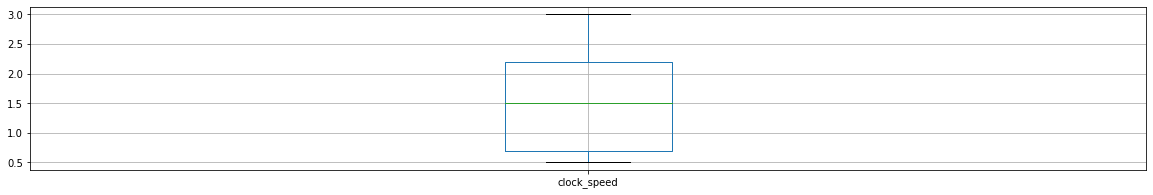

In [28]:
df_noDuplicate.boxplot(column=['clock_speed'], figsize=(20,3))

In [29]:
df_noDuplicate['clock_speed'].skew()

0.17802772732692415

Karena distribusi atribut clock_speed tidak ada outlier namun cukup skewed, maka saya akan mengisi null value pada atribut clock_speed dengan median

In [30]:
col = ['clock_speed']
for c in col:
    median = int(df_cleaned[~df_cleaned.isna()].clock_speed.median())
    df_cleaned[c] = df_cleaned[c].fillna(median)

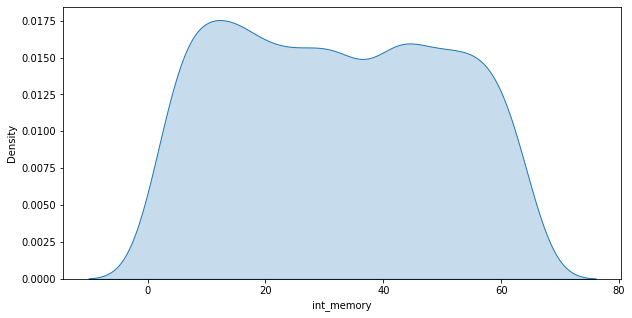

In [31]:
countplot('int_memory')

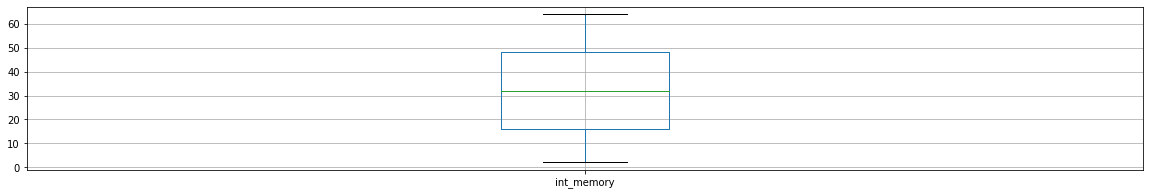

In [32]:
df_noDuplicate.boxplot(column=['int_memory'], figsize=(20,3))

In [33]:
df_noDuplicate['int_memory'].skew()

0.057429334425199374

Karena distribusi atribut int_memory berbentuk cukup simetri dan tidak ada outlier, maka saya akan mengisi null value pada atribut clock_speed dengan mean

In [34]:
col = ['int_memory']
for c in col:
    mean = int(df_cleaned[~df_cleaned.isna()].int_memory.mean())
    df_cleaned[c] = df_cleaned[c].fillna(mean)

Kemudian saya mengisi null values yang ada pada kategorical attribute dengan nilai modus

In [35]:
col = ['touch_screen']
for c in col:
    mode = int(df_cleaned[~df_cleaned.isna()].touch_screen.mode())
    df_cleaned[c] = df_cleaned[c].fillna(mode)

In [36]:
col = ['wifi']
for c in col:
    mode = int(df_cleaned[~df_cleaned.isna()].wifi.mode())
    df_cleaned[c] = df_cleaned[c].fillna(mode)

In [37]:
cek_null(df_cleaned)

Tidak ditemukan missing value pada dataset


Dapat dilihat di atas bahwa sudah tidak ada null values pada data set

3\. [3] Menurut Anda, apakah perlu dilakukan normalisasi terhadap data, atau cukup menggunakan data asli? Jika ya, bentuk normalisasi apa yang tepat digunakan pada data? Jelaskan secara singkat alasan Anda!


> Jawaban: 

> Menurut saya, Ya perlu dilakukan normalisasi. Hal tersebut karena range antar atribut numerical berbeda-beda sehingga kita butuh melakukan standardisasi. Selain itu, kelebihan normalisasi antara lain adalah:
Ingin mengurangi penggunaan memori,
Mempercepat jalannya prediksi pada model prediksi tertentu,
Mempengaruhi performa model klasifikasi tertentu, clustering,
Menghitung covariance matrix,
Menerapkan asumsi untuk tes hipotesis data tertentu,
Menjauhi/menghilangkan/mengecilkan outliers,
Terdapat column yang memiliki range value yang berbeda jauh dengan yang lainnya, dan
Terdapat value yang memiliki nilai jauh lebih besar.

Saya memilih menggunakan MinMaxScaler dalam normalisasi karena outlier pada dataset ini sedikit. Melalui MinMaxScaler, ia mengubah distribusi data dalam range 0 - 1. Selain itu, MinMaxScaler mempertahankan bentuk distribusi aslinya dan tidak mengubah informasi dari dataset yang asli.

4\. [10] Sebelum data diproses lebih lanjut lakukan *feature selection* dengan memilih beberapa fitur yang paling optimal untuk mengklasifikasikan label target!

Pertama-tama, saya coba melihat korelasi antara fitur-fitur dengan target feature. Saya menggunakan heatmap untuk memvisualisasikannya untuk melihat gambaran secara keseluruhan

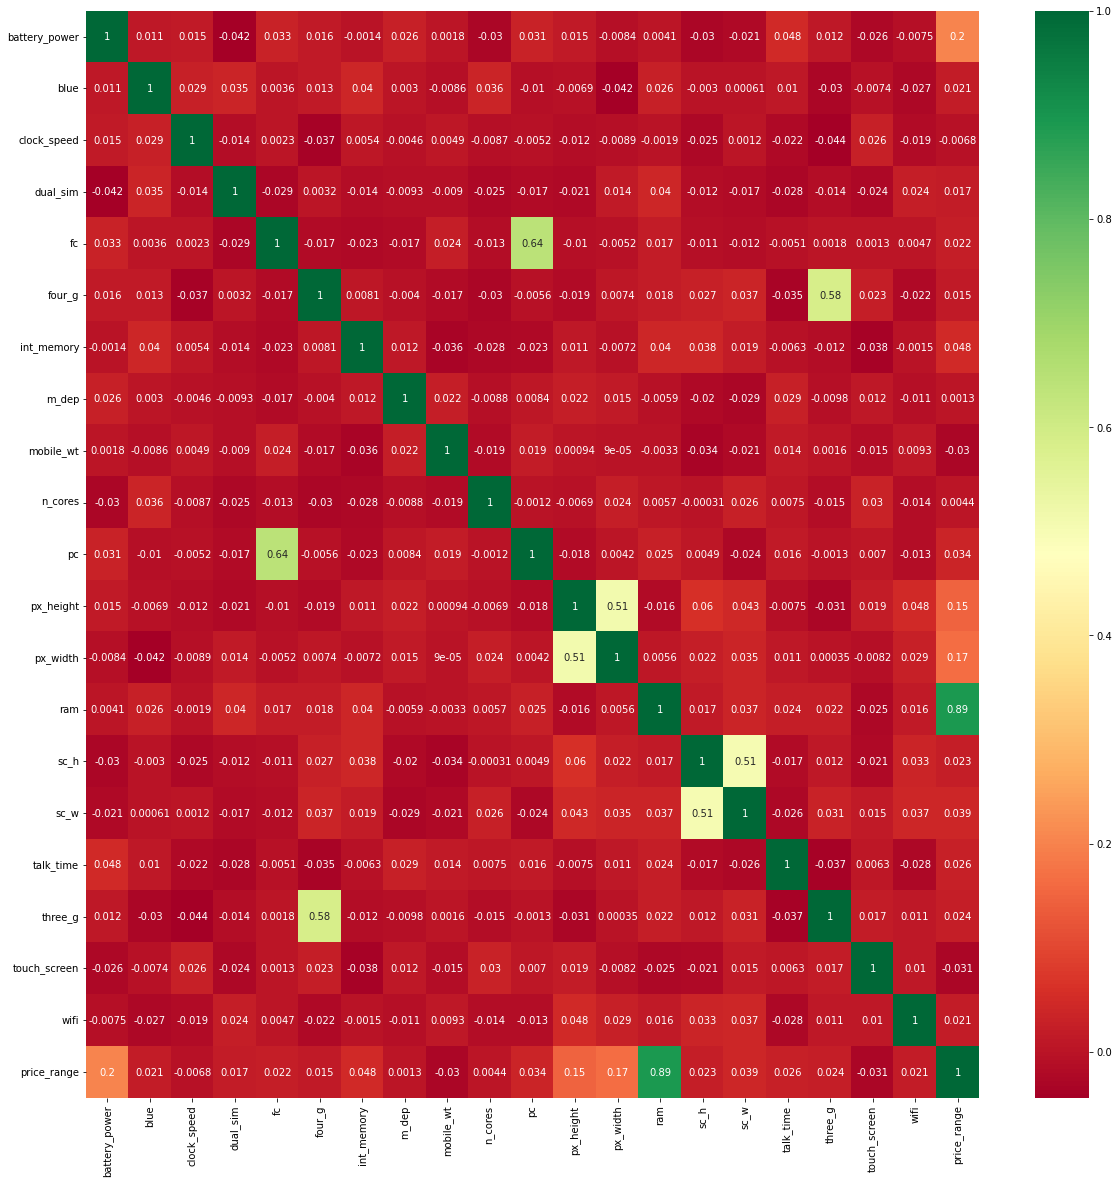

In [38]:
corrmat = df_cleaned.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_cleaned[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Kemudian, saya memisahkan terlebih dahulu target variable yaitu price_range dari dataset

In [39]:
y = df_cleaned.price_range # Target variable             
df_cleaned.drop(['price_range'], axis=1, inplace=True) # Removing target variable from training data

Kemudian, saya melakukan feature selection dengan metode wrapper dengan cara backwards

In [40]:
import statsmodels.api as sm

X_1 = sm.add_constant(df_cleaned)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues


#Backward Elimination
cols = list(df_cleaned.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = df_cleaned[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future versi

['battery_power', 'mobile_wt', 'px_height', 'px_width', 'ram']


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


5\. [6] Apa saja fitur-fitur yang terpilih hasil dari *feature selection*? Jelaskan strategi Anda dalam memilih fitur-fitur tersebut dan berikan analisis mengapa fitur tersebut cocok digunakan untuk mengklasifikasi label target!

> Jawaban: Fitur yang dari hasil feature selection ada 5, yaitu
['battery_power', 'mobile_wt', 'px_height', 'px_width', 'ram']

Pertama-tama, saya menggunakan cara wrapper karena walaupun metode wrapper time consuming, namun hasil dari metode wrapper lebih akurat karena kita membandingkan kinerjanya jika subset fitur dijadikan input ke algoritma machine learning lalu diambil yang performanya paling tinggi. Untuk "mempermudah" kinerjanya supaya tidak secara brute force, maka saya menggunakan sequential feature selection secara backwards. Cara kerjanya, awalnya metode wrapper menggunakan semua fitur dahulu, lalu di setiap iterasi dilihat mana yang paling terbaik sehingga dari hasil tersebut dapat dieliminasi satu fitur, yaitu fitur yang tidak diinclude pada hasil iterasi yang terbaik. Dari metode wrapper secara backwards ini, didapatkan 5 fitur di atas yang sudah saya tuliskan. Hasil dari metode wrapper ini juga sejalan dengan korelasi yang dihasilkan pada heatmap di atas. Fitur battery_power, mobile_wt, px_height, px_width, dan ram memiliki korelasi yang paling menonjol dengan fitur price_range sehingga fitur tersebut cocok digunakan untuk mengklasifikasi label target

> 

Setelah dilakukan feature selection, maka saya menstardadisasi feature-feature yang sudah dipilih tersebut dengan MinMaxScaler

In [41]:
df_fixed = df_cleaned[['battery_power', 'mobile_wt', 'px_height', 'px_width', 'ram']]

scaler = MinMaxScaler(copy=True, clip=False, feature_range=(0, 1))
# Transform data
scaled = scaler.fit_transform(df_fixed)

df_fixed = pd.DataFrame(scaled)

## [75] **Classification**

**Pada bagian ini Anda akan diminta untuk melakukan klasifikasi harga suatu mobile phone berdasarkan fitur-fitur yang sudah Anda pilih sebelumnya. Anda akan mencoba berbagai macam model klasifikasi seperti Decision Tree, Random Forest, Naive Bayes, dan K-nearest Neighbors untuk mencari model yang memiliki performa terbaik.**

### [3] Preparation

6\. [3] Buatlah model K-Fold Cross Validation yang akan digunakan untuk membagi dataset train dan test menjadi beberapa bagian (*fold*). Strategi ini akan Anda gunakan pada semua *classifier* dibandingkan dengan strategi sebelumnya yang hanya membagi data ke dalam data training dan testing menggunakan method `train_test_split`.

In [42]:
# Select numeric columns only
numeric_cols = [cname for cname in df_fixed.columns if df_fixed[cname].dtype in ['int64', 'float64']]
X = df_fixed[numeric_cols].copy()

print("Shape of input data: {} and shape of target variable: {}".format(X.shape, y.shape))

X.head() # Show first 5 training example

Shape of input data: (2000, 5) and shape of target variable: (2000,)


,0,1,2,3,4
0,0.227789,0.900000,0.010204,0.170895,0.612774
1,0.347361,0.466667,0.461735,0.993324,0.634687
2,0.041416,0.541667,0.644388,0.811749,0.627205
3,0.076152,0.425000,0.620408,0.858478,0.671566
4,0.881764,0.508333,0.616327,0.475300,0.308658


Saya kemudian membagi data menjadi 5 fold. Banyaknya data training dan testing untuk setiap fold dapat dilihat di bawah ini.

In [43]:
# Lets split the data into 5 folds.  
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
kf =KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 1600, Test set:400
Fold:2, Train set: 1600, Test set:400
Fold:3, Train set: 1600, Test set:400
Fold:4, Train set: 1600, Test set:400
Fold:5, Train set: 1600, Test set:400


### [19] Decision Tree

Scoring yang digunakan adalah accuracy untuk mengukur kinerja model dalam hal mengukur rasio jumlah true positive dan true negatif dari semua prediksi yang dibuat.

7\. [4] Implementasikan model Decision Tree tanpa konfigurasi parameter apapun, serta berikan hasil evaluasinya!

In [44]:
score = cross_val_score(DecisionTreeClassifier(), X, y, cv=kf, scoring="accuracy")
print(f'Scores for each fold: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold: [0.83   0.7775 0.825  0.825  0.7775]
Average score: 0.81


8\. [4] Implementasikan model Decision Tree dengan memberikan parameter nilai `min_samples_leaf=50`; serta berikan hasil evaluasinya!

In [45]:
score = cross_val_score(DecisionTreeClassifier(min_samples_leaf=50), X, y, cv=kf, scoring="accuracy")
print(f'Scores for each fold: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold: [0.745 0.78  0.76  0.775 0.74 ]
Average score: 0.76


9\. [6] Bandingkan model yang dibuat pada soal nomor 7 dan nomor 8, manakah yang lebih baik? Berikan analisis Anda terkait bagaimana hubungan perubahan parameter tersebut dengan kualitas hasil klasifikasi!

> Jawaban: 

> Yang lebih baik adalah model Decision Tree tanpa menggunakan parameter. Hal tersebut karena pada nomor 8, kita mengeset min_sample_leaf sebanyak 50 yang berarti node pada tree setidaknya memiliki 50 samples. Hal tersebut rupanya tidak cocok dan malah memperburuk kinerja model yang menghasilkan average score yang menurun.

10\. [5] Buatlah model yang memiliki performa yang lebih bagus dibanding kedua model sebelumnya! Anda dibebaskan untuk melakukan eksplorasi dalam mengkonfigurasi parameter yang dipakai.

Untuk menghasilkan model yang performanya lebih bagus, saya mengguakan Hyperparameter Tuning. Hyperparameter tuning dapat digunakan ntuk mendapatkan hasil evaluasi yang terbaik untuk suatu model. Saya mencoba berbagai kombinasi hyperparameter yang diinginkan, seperti criterion, min_samples_split, max_depth, dan min_samples_leaf. Untuk mempermudah mencari hyperparameter yang tepat, saya dapat menggunakan modul GridSearchCV dari library Scikit-Learn.

In [46]:
param_grid = {'criterion': ['gini', 'entropy'],
               'min_samples_split': [7, 10, 20],
               'max_depth' : [5, 8, 10, 12, None],
              'min_samples_leaf': [1, 4, 5, 10, 15]}

dt = DecisionTreeClassifier()

clf = GridSearchCV(estimator= dt, 
                   param_grid=param_grid, cv= 5)

clf.fit(X, y)

clf.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'min_samples_leaf': 1,
 'min_samples_split': 7}

In [47]:
score = cross_val_score(DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=1, min_samples_split=7), X, y, cv=kf, scoring="accuracy")
print(f'Scores for each fold: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold: [0.84   0.835  0.8425 0.83   0.825 ]
Average score: 0.83


### [18] Random Forest

Scoring yang digunakan adalah accuracy untuk mengukur kinerja model dalam hal mengukur rasio jumlah true positive dan true negatif dari semua prediksi yang dibuat.

11\. [4] Implementasikan model Random Forest tanpa konfigurasi parameter apapun, serta berikan hasil evaluasinya!

In [48]:
score = cross_val_score(RandomForestClassifier(), X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.875  0.875  0.8725 0.875  0.8675]
Average score: 0.87


12\. [8] Implementasikan model Random Forest dengan parameter yang didapatkan dari hasil Hyperparameter Tuning, serta berikan hasil evaluasinya!

In [49]:
param_grid = {'criterion': ['gini', 'entropy'],
               'min_samples_split': [10, 20, 50],
               'max_depth' : [5, 10, 12],
              'n_estimators': [100, 400]}

rf = RandomForestClassifier()

clf = GridSearchCV(estimator= rf, 
                   param_grid=param_grid, cv= 5)

clf.fit(X, y)

clf.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'min_samples_split': 10,
 'n_estimators': 400}

In [50]:
score = cross_val_score(RandomForestClassifier(criterion= 'entropy',max_depth= 12, min_samples_split= 10, n_estimators= 400), X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.8775 0.8825 0.8775 0.87   0.8875]
Average score: 0.88


13\. [6] Bandingkan model yang dibuat pada soal nomor 11 dan nomor 12, manakah yang lebih baik? Berikan analisis Anda terkait bagaimana hubungan perubahan parameter tersebut dengan kualitas hasil klasifikasi!

> Jawaban: 

> Yang lebih baik adalah nomor 12 setelah yaitu dengan menggunakan pemakaian parameter dari hasil hyperparameter tuning melalui GridSearchCV. GridSearchCV akan mencoba semua kombinasi nilai yang diteruskan dalam dictionary param_grid dan mengevaluasi model untuk setiap kombinasinya menggunakan metode Cross-Validation. Kemudian, didapatkan akurasi/loss untuk setiap kombinasi hyperparameter. Dengan demikian kita bisa mendapatkan hyperparameter yang terbaik. Hal ini tentunya mengubah kualitas hasil klasifikasi. Namun, secara keseluruhan model yang dibuat pada nomor 11 dan 12 average scorenya tidak jauh beda (hanya beda 0.01).


### [16] Naive Bayes

Scoring yang digunakan adalah accuracy untuk mengukur kinerja model dalam hal mengukur rasio jumlah true positive dan true negatif dari semua prediksi yang dibuat.

14\. [4] Implementasikan model dari salah satu variasi Naive Bayes; serta berikan hasil evaluasinya!

In [51]:
from sklearn.naive_bayes import GaussianNB
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = GaussianNB()
score = cross_val_score(modelnb, X, y, cv=kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.785  0.7925 0.75   0.7625 0.785 ]
Average score: 0.78


15\. [6] Apa alasan dan pertimbangan Anda dalam memilih variasi tersebut dibandingkan variasi Naive Bayes lainnya? 

> Jawaban:

> Saya menggunakan Gaussian Naive Bayes Model karena data dari feature selection bersifat numerik dan mengikuti distribusi yang cenderung seperti distribusi gausian atau distribusi normal. Terdapat empat variasi naive bayes lainnya, yaitu Multinomial Naive Bayes (untuk data yang digunakan memiliki distribusi multinomial sederhana), Complement (untuk data yang digunakan memiliki distribusi multinomial sederhana yang bersifat imbalanced), Bernoulli Naive Bayes (untuk data yang digunakan memiliki distribusi multinomial sederhana dengan bentuk yang diskret dan terdistribusi dalam bentuk binary ), dan Categorical Naive Bayes (untuk tipe data yang nilainya terdistribusi secara kategorikal). Dari variasi naive bayes yang ada, saya merasa Gaussian Naive Bayes merupakan yang paling cocok dengan dataset yang saya gunakan sekarang.

16\. [6] Masing-masing variasi Naive Bayes dibuat khusus untuk menyesuaikan tipe data tertentu pada data yang digunakan. Jika data yang ada memiliki tipe fitur yang bervariasi (numerik, biner, kategorik, dll), apakah kita bisa menggunakan salah satu variasi algoritma saja? Bagaimana strategi Anda dalam menganani kasus tersebut?

> Jawaban:

> Kasus di atas membutuhkan penanganan terlebih dahulu sebelum langsung menggunakan satu variasi algoritma saja dalam Naive Bayes. Untuk data yang bersifat categorical, kita dapat melakukan encoding terlebih dahulu. Kemudian, kita dapat memperkirakan 𝑝(𝑥|𝑦) dengan algoritma yang dapat menampung categorical value, seperti bernouli atau multinomial. Sementara itu, atribut yang bersifat numerical diolah dengan algoritma lain seperti gaussian (perlu diperhatikan juga ciri-ciri lain seperti bentuk distribusinya dll ketika memilih algoritma naive bayes). Terakhir, kalikan conditional probability tersebut bersama-sama dalam prediksi akhir karena mereka juga bersifat saling independent

### [12] K-nearest Neighbors

Scoring yang digunakan adalah accuracy untuk mengukur kinerja model dalam hal mengukur rasio jumlah true positive dan true negatif dari semua prediksi yang dibuat.

17\. [4] Implementasikan model KNN dengan memberikan parameter nilai `n_neighbors=3`; serta berikan hasil evaluasinya!

In [52]:
KNN = KNeighborsClassifier(n_neighbors=3)
score = cross_val_score(KNN, X, y, cv=kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.7875 0.81   0.7725 0.8125 0.7925]
Average score: 0.80


18\. [8] Implementasikan model KNN dengan parameter yang didapatkan dari hasil Hyperparameter Tuning, serta berikan hasil evaluasinya!

In [53]:

model = KNeighborsClassifier()

# parameter yang akan di tunning
tunned_params = [
  { 
    'n_neighbors': [1,2,3,4,5], 'leaf_size': [1,5,10], 'p': [1,2]
  } 
]

print("##### Tuning hyper-parameters model KNN #####")
print()

clfKNN = GridSearchCV(model, 
                    tunned_params,
                     scoring="accuracy",
                    cv=5,
                   verbose = 2
                    )

clfKNN.fit(X, y)

print("Best parameters set found on development set:")
print()
print(clfKNN.best_params_)

##### Tuning hyper-parameters model KNN #####

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ....................leaf_size=1, n_neighbors=1, p=1; total time=   0.0s
[CV] END ....................leaf_size=1, n_neighbors=1, p=1; total time=   0.0s
[CV] END ....................leaf_size=1, n_neighbors=1, p=1; total time=   0.0s
[CV] END ....................leaf_size=1, n_neighbors=1, p=1; total time=   0.0s
[CV] END ....................leaf_size=1, n_neighbors=1, p=1; total time=   0.0s
[CV] END ....................leaf_size=1, n_neighbors=1, p=2; total time=   0.0s
[CV] END ....................leaf_size=1, n_neighbors=1, p=2; total time=   0.0s
[CV] END ....................leaf_size=1, n_neighbors=1, p=2; total time=   0.0s
[CV] END ....................leaf_size=1, n_neighbors=1, p=2; total time=   0.0s
[CV] END ....................leaf_size=1, n_neighbors=1, p=2; total time=   0.0s
[CV] END ....................leaf_size=1, n_neighbors=2, p=1; total time=   0.0s


In [54]:
KNN = KNeighborsClassifier(n_neighbors=5, leaf_size=1, p=1)
score = cross_val_score(KNN, X, y, cv=kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.795  0.8075 0.8    0.8275 0.8075]
Average score: 0.81


### [7] Analisis

19\. [7] Dari keempat variasi model (Decision Tree, Random Forest, Naive Bayes, dan KNN) yang sudah Anda coba, manakah model yang memiliki performa terbaik? Berikan analisis Anda!

> Jawaban:

> Dari variasi model yang sudah saya lakukan, Random Forest dengan parameter berupa 

{'criterion': 'entropy',
 'max_depth': 12,
 'min_samples_split': 10,
 'n_estimators': 400}

memiliki average score yang paling tinggi yaitu 0.88.
Nilai terbaik untuk tiga variasi model lainnya adalah:

KNN: 0.81
Naive Bayes: 0.78
Decision Tree: 0.83 

Random forest memiliki performa yang paling baik untuk dataset ini. Setiap pemisahan tree, model hanya mempertimbangkan sebagian kecil fitur daripada semua fitur model. Random forest hanya mencari fitur yang paling penting saat memisahkan node. Random forest mencari fitur terbaik di antara subset fitur yang ada. Ini menghasilkan keragaman yang luas yang umumnya menghasilkan model yang lebih baik. Hasil dari random forest ini mengimprove akurasi dan mengurangi overfitting. Prediksi dari Random Forest Regressor adalah rata-rata dari prediksi yang dihasilkan oleh masing-masing tree